In [ ]:
import matplotlib.pyplot as plt 
import json
import os

import numpy as np
import torch
import torchvision

from PIL import Image

In [2]:
def plot_results(data,filename):

    title = filename.split('/')[-1]
    # Data for the table
    columns = ['id','blur','normal noise','uniform noise','laplace noise','patch']
    rows = ["Absolute Score","Relative Score in %"]
    scores = list(map(lambda x: round(x,3),list(data['scores'].values())))
    abs_scores = list(map(lambda x: round(x/scores[0],3),scores))
    percent_change = list(map(lambda x: round(x/abs_scores[0]*100,3),abs_scores))
    vals = [scores,percent_change]
    

    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(title)
    # Create the table
    table = ax.table(cellText=vals, 
                     colLabels=columns, 
                     rowLabels=rows, 
                     loc='best', 
                     cellLoc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(columns))))
    plt.show()

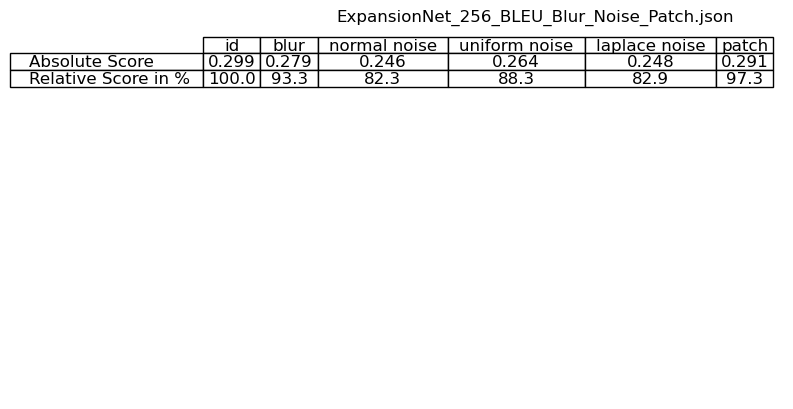

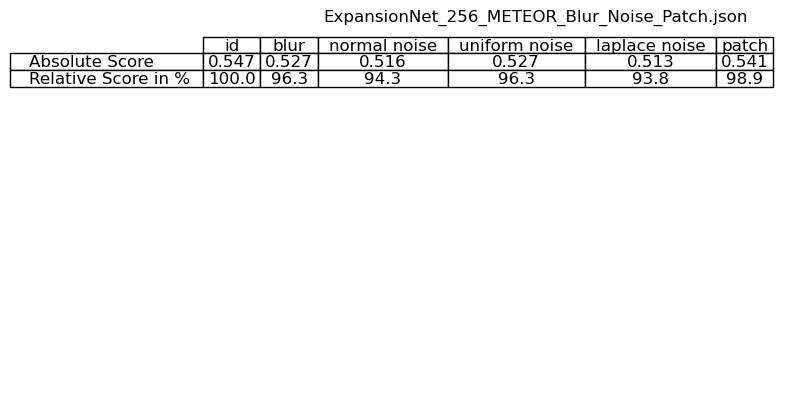

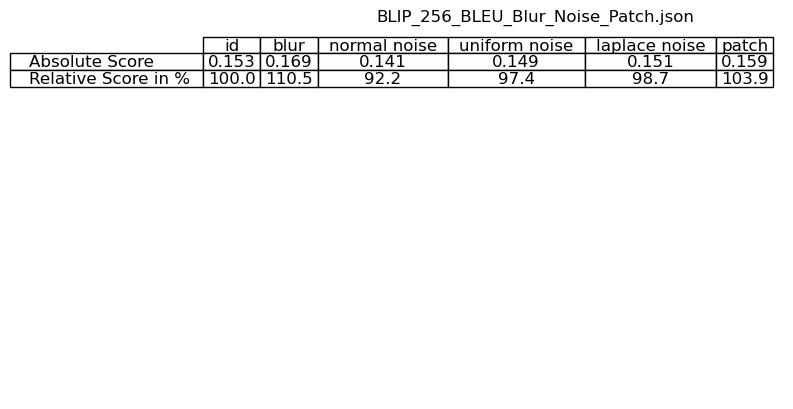

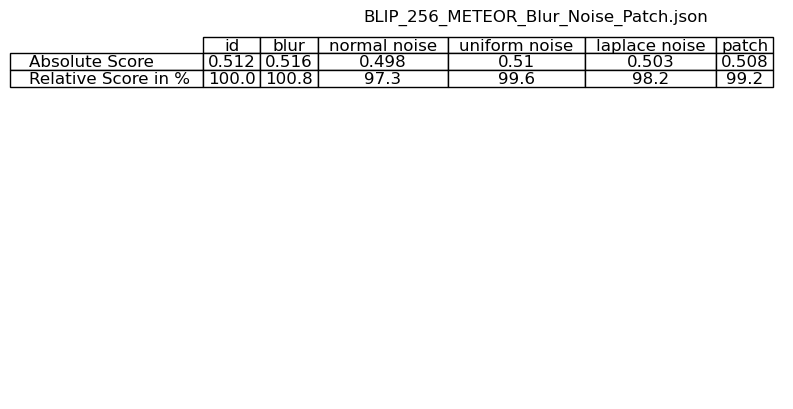

In [3]:
for file_name in os.listdir('benchmarks'):
    if file_name[-4:] != 'json':
        continue
    file_path = os.path.join('benchmarks', file_name)
    with open(file_path, 'r') as openfile:
        data = json.load(openfile)
        
    plot_results(data,file_path)

In [4]:
def sorted_indexes(lst):
    return sorted(range(len(lst)), key=lambda k: lst[k][0]-lst[k][1], reverse = True)

In [ ]:
file_path = "BLIP_filtered_attacks.json"
with open(file_path, 'r') as openfile:
    data = json.load(openfile)

tensors = torch.load("BLIP_filtered_tensors")

#meteor_pairs = data['captions']['meteor']
#bleu_pairs = data['captions']['bleu']

meteor_pairs = data['scores']['meteor']

meteor_indexes = list(range(122))# sorted_indexes(meteor_pairs)
#bleu_indexes = sorted_indexes(bleu_pairs)

caption_pairs = data['captions']#['paired']

blip_meteor_data = list(zip([caption_pairs[i] for i in meteor_indexes],[meteor_pairs[i] for i in meteor_indexes],[tensors[i] for i in meteor_indexes]))
#bleu_data = list(zip([caption_pairs[i] for i in bleu_indexes],[bleu_pairs[i] for i in bleu_indexes],[tensors[i] for i in bleu_indexes]))

In [6]:
file_path = "./adversarial_attacks/ExpNet/v1/ExpNet_512_1_cap.json"
with open(file_path, 'r') as openfile:
    data = json.load(openfile)

#tensors = torch.load("./adversarial_attacks/ExpNet/v1/ExpNet_512_pert.pt")
images = torch.load("./adversarial_attacks/ExpNet/512_img.pt").to('cuda')
#meteor_pairs = data['captions']['meteor']
#bleu_pairs = data['captions']['bleu']

meteor_pairs = data['scores']['meteor']

meteor_indexes = list(range(256))# sorted_indexes(meteor_pairs)
#bleu_indexes = sorted_indexes(bleu_pairs)

caption_pairs = data['captions']#['paired']

ExpNet_meteor_data = list(zip([caption_pairs[i] for i in meteor_indexes],[meteor_pairs[i] for i in meteor_indexes],[images[i] for i in meteor_indexes]))
#bleu_data = list(zip([caption_pairs[i] for i in bleu_indexes],[bleu_pairs[i] for i in bleu_indexes],[tensors[i] for i in bleu_indexes]))

In [7]:
def show_data(data,index_list=None, show_eval_scores=True,show_images = True,title = ""):    
    if index_list is not None:
        data = [data[i] for i in index_list]
    
    print(title)
    for i,ex in enumerate(data):
        if show_images:
            print(ex[2][0].shape)
            if len(ex[2][0].shape) == 4:
                original = ex[2][0][0]
                pert = ex[2][1][0]
            else:
                original = ex[2]
                #pert = ex[2][1]
            torchvision.transforms.ToPILImage()(original).show()
            
            
            #corrupted = torch.clamp(original+pert,0.0,1.0)
            
            
            #torchvision.transforms.ToPILImage()(corrupted).show()
        print("\n")
        print("Index:",i)
        print("Original out:",ex[0][0])
        print("Attacked out:",ex[0][1])

        if show_eval_scores:
            print("\n")
            print("Original score:",ex[1][0])
            print("Attacked score:",ex[1][1])
            print("Change in %:",-(ex[1][0]-ex[1][1])/ex[1][0]*100)
        print("########################################\n\n")

In [ ]:
show_data(blip_meteor_data,[0],True,True,"BLIP Attacks on high METEOR score examples")

In [10]:
# Load the JSON file
filepaths = ["adversarial_attacks/ExpNet/v2/ExpNet_512_1_cap_v2.json", "adversarial_attacks/VIT/VIT_filtered.json", "adversarial_attacks/BLIP/BLIP_64_1_cap.json"]
for f in filepaths:
    with open(f, 'r') as file:
        data = json.load(file)

    # Extract "scores" -> "meteor"
    if "scores" in data.keys():
        meteor_scores = data.get("scores", {}).get("meteor", [])
    elif "captions" in data.keys() and "meteor" in data["captions"].keys():
        meteor_scores = data.get("captions", {}).get("meteor", [])

    # Calculate averages for initial and perturbed scores
    initial_scores = [scores[0] for scores in meteor_scores]
    perturbed_scores = [scores[1] for scores in meteor_scores]

    avg_initial = sum(initial_scores) / len(initial_scores) if initial_scores else 0
    avg_perturbed = sum(perturbed_scores) / len(perturbed_scores) if perturbed_scores else 0

    print(f"Average initial score: {avg_initial}, perturbed score: {avg_perturbed}")

Average initial score: 0.5821245002195766, perturbed score: 0.27299476358957087
Average initial score: 0.5975209976025807, perturbed score: 0.20137678007145035
Average initial score: 0.4619122894952106, perturbed score: 0.29849342655890515


In [ ]:
show_data(ExpNet_meteor_data,list(range(16)),True,True,"ExpNet Attacks on high METEOR score examples")

Blur Level: 3, Epsilon: 8
  - Clean METEOR Score: 0.5670
  - Adversarial METEOR Score: 0.4888
  - Score Drop: 0.0782
----------------------------------------
Blur Level: 3, Epsilon: 16
  - Clean METEOR Score: 0.5648
  - Adversarial METEOR Score: 0.4692
  - Score Drop: 0.0956
----------------------------------------
Blur Level: 3, Epsilon: 32
  - Clean METEOR Score: 0.5644
  - Adversarial METEOR Score: 0.4616
  - Score Drop: 0.1028
----------------------------------------
Blur Level: 5, Epsilon: 8
  - Clean METEOR Score: 0.5591
  - Adversarial METEOR Score: 0.4928
  - Score Drop: 0.0663
----------------------------------------
Blur Level: 5, Epsilon: 16
  - Clean METEOR Score: 0.5649
  - Adversarial METEOR Score: 0.4844
  - Score Drop: 0.0806
----------------------------------------
Blur Level: 5, Epsilon: 32
  - Clean METEOR Score: 0.5613
  - Adversarial METEOR Score: 0.4654
  - Score Drop: 0.0959
----------------------------------------
Blur Level: 7, Epsilon: 8
  - Clean METEOR Score

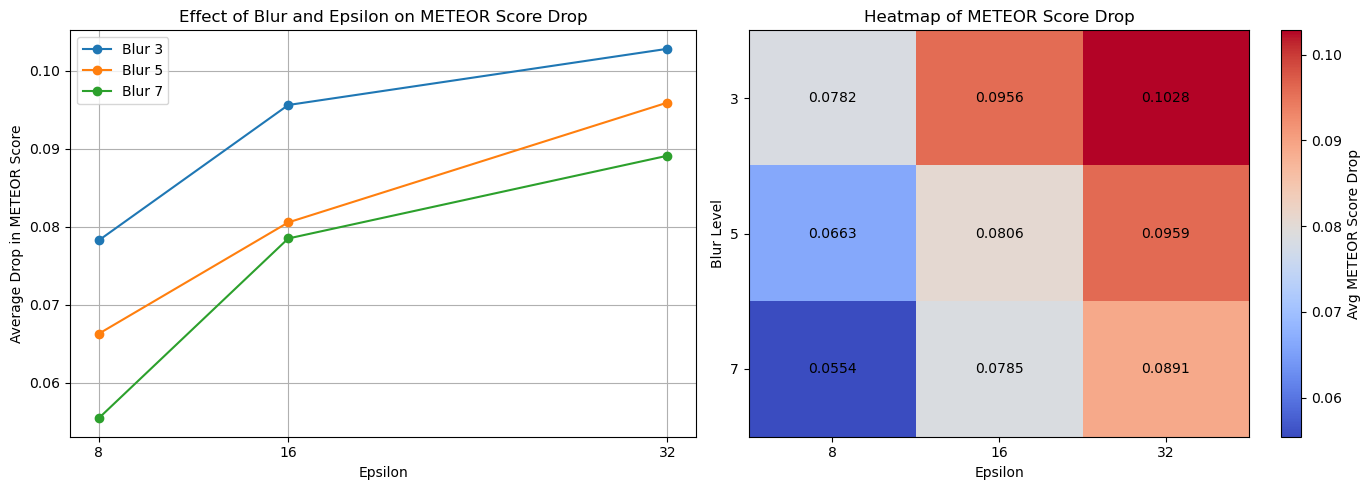

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory
base_dir = "adversarial_attacks/ExpNet"

# Store results
results = {}
clean_data = {}  # Store clean METEOR scores

# Traverse the directory structure
for blur_folder in ["blured3", "blured5", "blured7"]:
    blur_level = int(blur_folder.replace("blured", ""))  # Extract blur level
    results[blur_level] = {}

    for eps_folder in ["eps8", "eps16", "eps32"]:
        epsilon = int(eps_folder.replace("eps", ""))  # Extract epsilon level
        file_path = os.path.join(base_dir, blur_folder, eps_folder, "it25_exNum512.json")

        if os.path.exists(file_path):
            with open(file_path, "r") as f:
                data = json.load(f)

            # Extract METEOR scores
            clean_scores = [scores[0] for scores in data["scores"]["meteor"]]
            adversarial_scores = [scores[1] for scores in data["scores"]["meteor"]]
            
            avg_clean = np.mean(clean_scores)  # Avg clean score
            avg_adv = np.mean(adversarial_scores)  # Avg adversarial score
            avg_drop = avg_clean - avg_adv  # Compute drop
            
            # Store results
            results[blur_level][epsilon] = avg_drop
            clean_data[(blur_level, epsilon)] = avg_clean

            # Print results
            print(f"Blur Level: {blur_level}, Epsilon: {epsilon}")
            print(f"  - Clean METEOR Score: {avg_clean:.4f}")
            print(f"  - Adversarial METEOR Score: {avg_adv:.4f}")
            print(f"  - Score Drop: {avg_drop:.4f}")
            print("-" * 40)

# Convert results to sorted lists for plotting
blur_levels = sorted(results.keys())
epsilons = sorted(results[blur_levels[0]].keys())

# Prepare data for heatmap
heatmap_data = np.array([[results[blur][eps] for eps in epsilons] for blur in blur_levels])

# Create a figure with both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line Plot
for blur_level in blur_levels:
    meteor_drops = [results[blur_level][eps] for eps in epsilons]
    axes[0].plot(epsilons, meteor_drops, marker="o", label=f"Blur {blur_level}")

axes[0].set_xlabel("Epsilon")
axes[0].set_ylabel("Average Drop in METEOR Score")
axes[0].set_title("Effect of Blur and Epsilon on METEOR Score Drop")
axes[0].set_xticks(epsilons)
axes[0].legend()
axes[0].grid(True)

# Heatmap using Matplotlib's imshow
im = axes[1].imshow(heatmap_data, cmap="coolwarm", aspect="auto")

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1])
cbar.set_label("Avg METEOR Score Drop")

# Set axis labels and ticks
axes[1].set_xticks(np.arange(len(epsilons)))
axes[1].set_xticklabels(epsilons)
axes[1].set_yticks(np.arange(len(blur_levels)))
axes[1].set_yticklabels(blur_levels)

axes[1].set_xlabel("Epsilon")
axes[1].set_ylabel("Blur Level")
axes[1].set_title("Heatmap of METEOR Score Drop")

# Show values on heatmap
for i, blur in enumerate(blur_levels):
    for j, eps in enumerate(epsilons):
        axes[1].text(j, i, f"{heatmap_data[i, j]:.4f}", ha="center", va="center", color="black")

# Show plots
plt.tight_layout()
plt.show()

In [3]:
file_path = "adversarial_attacks/ExpNet/v1/ExpNet_512_1_cap.json"
if os.path.exists(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
        clean_data = [score[0] for score in data["scores"]["meteor"]]

print(f"Non-blured METEOR score: {np.mean(clean_data):.4f}")

Non-blured METEOR score: 0.5821


In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

model_names = ["ExpNet","BLIP"]
# Define the base directory
base_base_dir = "adversarial_attacks/"

# Store results
results = {}
clean_data = {}  # Store clean METEOR scores

# Traverse the directory structure
for model_name in model_names:
    base_dir = base_base_dir + model_name
    for blur_folder in ["blured3", "blured5", "blured7","blured9","blured11"]:
        blur_level = int(blur_folder.replace("blured", ""))  # Extract blur level
        results[model_name] = {}
        clean_data[model_name] = {}
        results[model_name][blur_level] = {}

        for eps_folder in ["eps8"]:
            epsilon = int(eps_folder.replace("eps", ""))  # Extract epsilon level
            file_path = os.path.join(base_dir, blur_folder, eps_folder, "it50_exNum256.json")

            if os.path.exists(file_path):
                with open(file_path, "r") as f:
                    data = json.load(f)

                # Extract METEOR scores
                clean_scores = [scores[0] for scores in data["scores"]["meteor"]]
                adversarial_scores = [scores[1] for scores in data["scores"]["meteor"]]
                
                avg_clean = np.mean(clean_scores)  # Avg clean score
                avg_adv = np.mean(adversarial_scores)  # Avg adversarial score
                avg_drop = avg_clean - avg_adv  # Compute drop
                
                # Store results
                results[model_name][blur_level][epsilon] = avg_drop
                clean_data[model_name][(blur_level, epsilon)] = avg_clean

                # Print results
                print(f"Blur Level: {blur_level}, Epsilon: {epsilon}")
                print(f"  - Clean METEOR Score: {avg_clean:.4f}")
                print(f"  - Adversarial METEOR Score: {avg_adv:.4f}")
                print(f"  - Score Drop: {avg_drop:.4f}")
                print("-" * 40)

# Convert results to sorted lists for plotting
blur_levels = [3,5,7,9,11]
print(results)

# Prepare data for heatmap
heatmap_data = np.array([[results[name][blur][8] for name in model_names] for blur in blur_levels]).transpose()

# Create a figure with both plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line Plot
for blur_level in blur_levels:
    meteor_drops = [results[name][blur_level][8] for name in model_names]
    axes[0].plot( meteor_drops,model_names, marker="o", label=f"Blur {blur_level}")

axes[0].set_xlabel("Epsilon")
axes[0].set_ylabel("Average Drop in METEOR Score")
axes[0].set_title("Effect of Blur and Epsilon on METEOR Score Drop")
axes[0].set_xticks(epsilons)
axes[0].legend()
axes[0].grid(True)

# Heatmap using Matplotlib's imshow
im = axes[1].imshow(heatmap_data, cmap="coolwarm", aspect="auto")

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1])
cbar.set_label("Avg METEOR Score Drop")

# Set axis labels and ticks
axes[1].set_xticks(np.arange(len(epsilons)))
axes[1].set_xticklabels(epsilons)
axes[1].set_yticks(np.arange(len(blur_levels)))
axes[1].set_yticklabels(blur_levels)

axes[1].set_xlabel("Epsilon")
axes[1].set_ylabel("Blur Level")
axes[1].set_title("Heatmap of METEOR Score Drop")

# Show values on heatmap
for i, blur in enumerate(blur_levels):
    for j, eps in enumerate(epsilons):
        axes[1].text(j, i, f"{heatmap_data[i, j]:.4f}", ha="center", va="center", color="black")

# Show plots
plt.tight_layout()
plt.show()